# Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

# Exercise 1

### Single-Layer Neural Network

Single layer neural network\
One neuron with input features\
Weights associated with these features\
A bias\
Sigmoid activation function to make predictions\
Log loss

In [16]:
def plot_decision_boundary (nn , X, y, title =" Decision Boundary "):
    x_min , x_max = X[:, 0]. min () - 1, X[:, 0]. max () + 1
    x_values = np. linspace (x_min , x_max , 300)

    """
    6 TODO : Calculate the y_values for the decision boundary line based on the
    model ’s weights , the x_values and the model bias .
    7 """

    y_values = (-nn.weights[0]/nn.weights[1]) * x_values - (nn.bias / nn.weights[1])
     
    plt . scatter (X[:, 0], X[:, 1], c=y, s=20 , edgecolor ="k")
    plt . plot ( x_values , y_values , label =" Decision Boundary ")
    plt . xlim (x_min , x_max )
    plt . ylim (X[:, 1]. min () - 1, X[:, 1]. max () + 1)
    plt . title (title)
    plt . legend ()
    plt . show ()

In [17]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    sigmoid_output = 1 / (1 + np.exp(-z))
    return sigmoid_output

In [18]:
class SingleLayerNN:
    def __init__(self, input_dimensions):
        # Init random weights and bias
        self.weights = np.random.rand(2)
        self.bias = 1

    def predict(self, x):
        '''
        Sum up all the weights
        Add bias
        Use activation function and return output
        '''
        summed_weight = np.dot(self.weights.T, x) + self.bias
        prediction_output = sigmoid(summed_weight)
        return prediction_output

    def train(self, X, y, epochs, learning_rate):
        '''
        Define learning rate and make prediction
        Go through all of the epochs
        Predict the current states
        Calculate the loss for convenience
        Define the update rules and utilise them
        '''
        learning_rate = learning_rate
        print(f"Learning rate: {learning_rate}")

        # Decision boundary before training        
        plot_decision_boundary(self, X, y)

        for epoch in range(epochs+1):
            if epoch == epochs:
                plot_decision_boundary(self, X, y)
                return
            for i in range(len(X)):
                # Prediction
                y_pred = self.predict(x=X[i])
                # loss = -(y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
                # print(f"Epoch: {epoch+1}/{epoch+1}, Loss: {loss}, Value: {X[i]}")
                # Update rules
                delta = (y[i] - y_pred)
                derivative = (y_pred * (1 - y_pred))
                dw = (learning_rate * delta) * derivative  * X[i]
                db = (learning_rate * delta) * derivative
                # Update variables
                self.weights = self.weights + dw
                self.bias = self.bias + db

            # Debugging / testing behaviour
            y_pred = self.predict(x=X.T)
            loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            avg_loss = np.mean(loss)
            print(f"Average loss: {avg_loss}")



            # Make Prediction
            #y_pred = self.predict(x=X)
            # print(len(y_pred))

            # Calculating and printing loss
            # loss = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            # avg_loss = np.mean(loss)
            # print(f"Currently in epoch {epoch+1}/{epochs} with average loss {avg_loss}")

            # Defining update rules
            # delta = (y - y_pred)
            # derivative = y_pred * (1 - y_pred)
            # dw = learning_rate * np.dot(X.T, delta * derivative)
            # db = learning_rate * delta * derivative

            # Update parameters
            # self.weights = self.weights + dw
            # self.bias = self.bias + db
        
        
        # Decision boundary after training
        '''Call to the DecisionBoundaryFunction'''

In [19]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

In [20]:
# Define training X, y
X = np.concatenate((features_class_0, features_class_1), axis=0)
y = np.concatenate((np.zeros(n_samples), np.ones(n_samples)), axis=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [21]:
learning_rates = [1.0, 0.1, 0.001, 0.0001, 0.00001]

Learning rate: 1.0


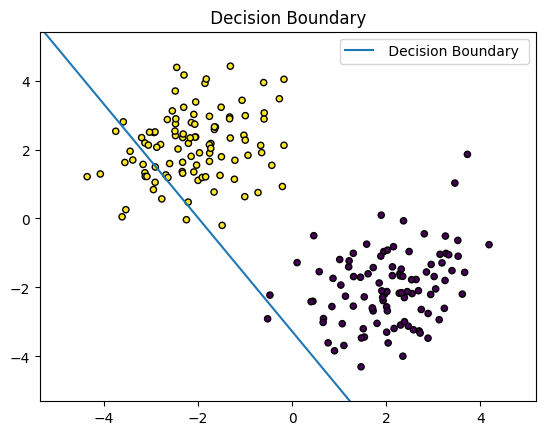

Average loss: 0.01538065852130431
Average loss: 0.011371752405979317
Average loss: 0.00933096976314541
Average loss: 0.008046011333604604
Average loss: 0.007144694652924996
Average loss: 0.006469253831880422
Average loss: 0.005939839361192672
Average loss: 0.00551114419233188
Average loss: 0.005155307997704626
Average loss: 0.0048541411870002184


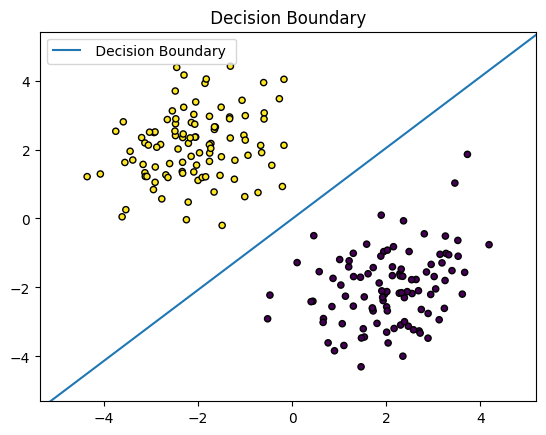

Learning rate: 0.1


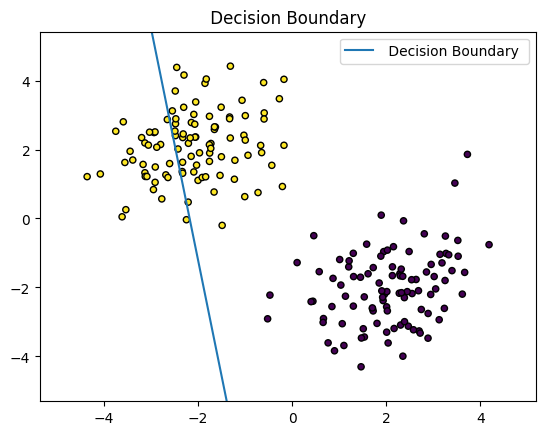

Average loss: 0.07746272584551753
Average loss: 0.04948243246315103
Average loss: 0.038726326583548853
Average loss: 0.032704964952617085
Average loss: 0.02874274458604921
Average loss: 0.025887200085747235
Average loss: 0.02370545391322678
Average loss: 0.021969307322107355
Average loss: 0.020545732922464765
Average loss: 0.01935131570498731


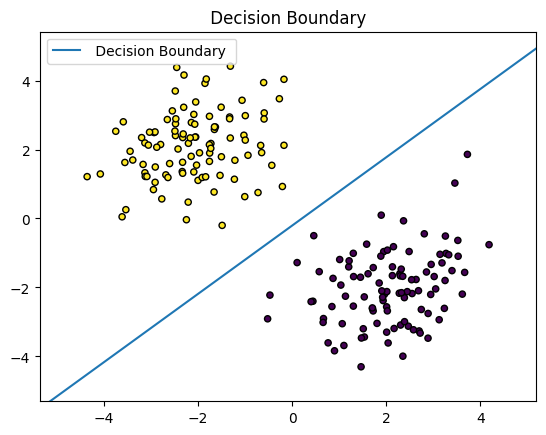

Learning rate: 0.001


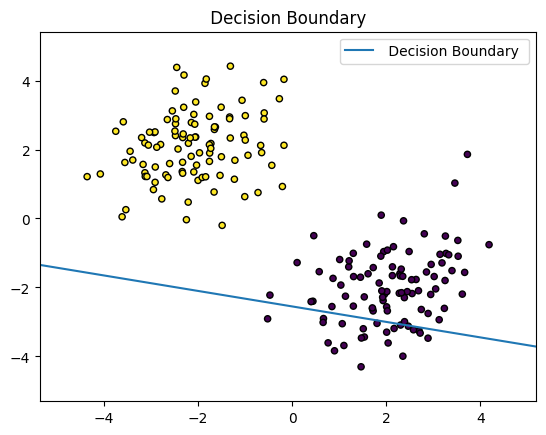

Average loss: 0.5120694612095166
Average loss: 0.47022830829053236
Average loss: 0.4336925803861034
Average loss: 0.40182149883847557
Average loss: 0.373994091663882
Average loss: 0.3496395297108116
Average loss: 0.32825157858023785
Average loss: 0.3093919438891019
Average loss: 0.2926870187843228
Average loss: 0.2778213655338665


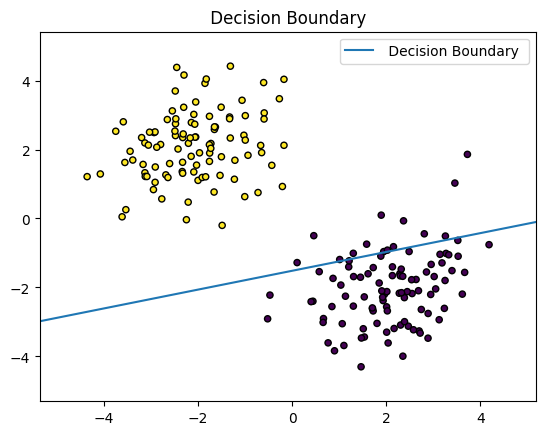

Learning rate: 0.0001


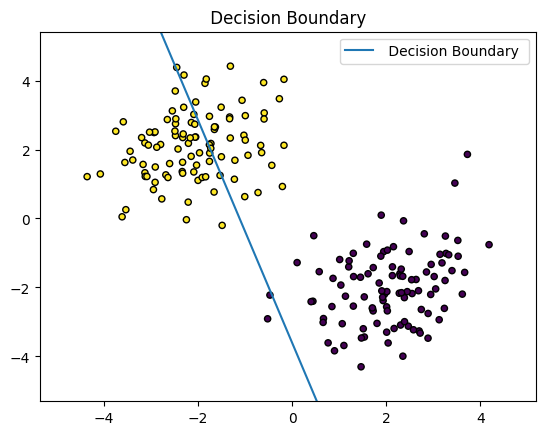

Average loss: 1.6735999767042353
Average loss: 1.6616804063441561
Average loss: 1.6497807421624564
Average loss: 1.6379022568242037
Average loss: 1.6260462156069733
Average loss: 1.614213875656536
Average loss: 1.6024064852745528
Average loss: 1.5906252832389207
Average loss: 1.5788714981572083
Average loss: 1.567146347853359


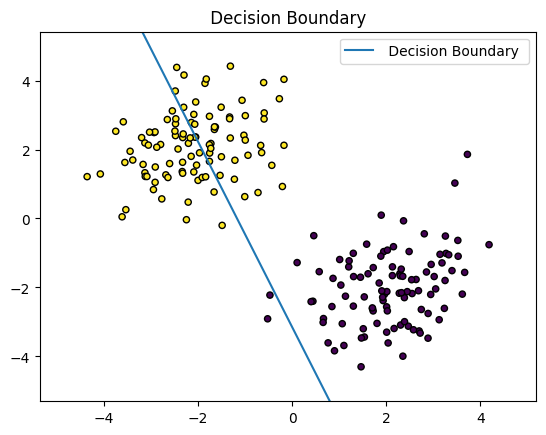

Learning rate: 1e-05


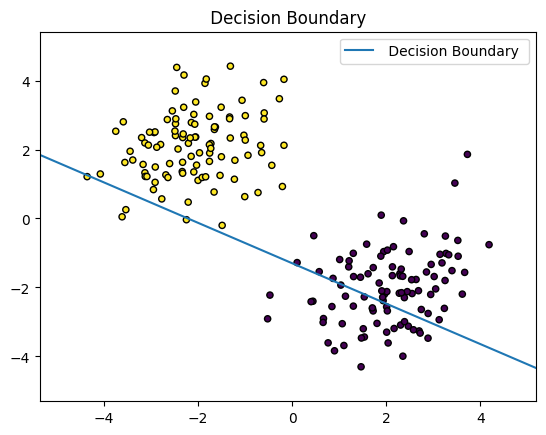

Average loss: 0.6209277887481348
Average loss: 0.6204547646487396
Average loss: 0.6199822541591269
Average loss: 0.6195102568035469
Average loss: 0.6190387721060613
Average loss: 0.6185677995905502
Average loss: 0.6180973387807108
Average loss: 0.6176273892000633
Average loss: 0.6171579503719521
Average loss: 0.6166890218195509


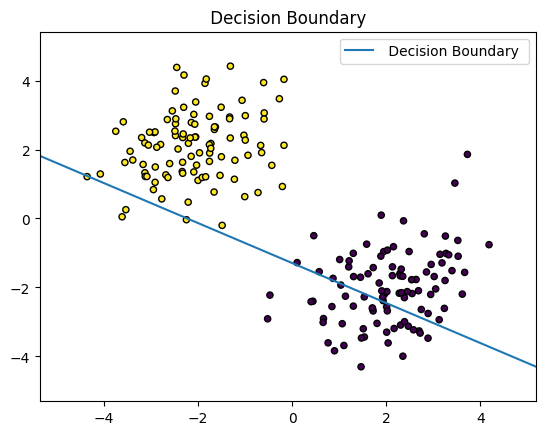

In [22]:
for learning_rate in learning_rates:
    single_layer_nn = SingleLayerNN(input_dimensions=2)
    single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=learning_rate)

Learning rate: 0.1


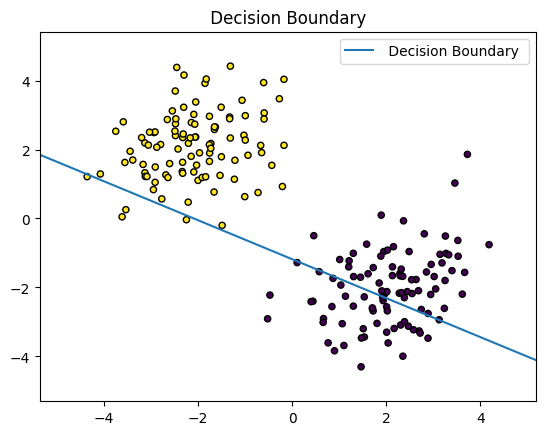

Average loss: 0.07489774552974451
Average loss: 0.045945575505696806
Average loss: 0.03436439525650902
Average loss: 0.028289965379002777
Average loss: 0.024597977579634275
Average loss: 0.022093196131750457
Average loss: 0.02025457239908252
Average loss: 0.018828021151012123
Average loss: 0.0176763147840335
Average loss: 0.01671878297787001


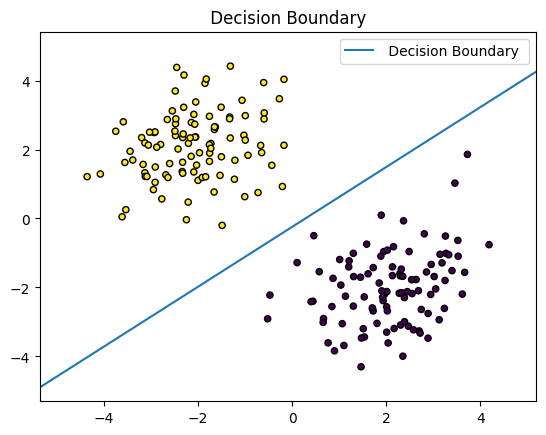

In [23]:
single_layer_nn = SingleLayerNN(input_dimensions=2)
single_layer_nn.train(X=X, y=y, epochs=10, learning_rate=0.1)

# Exercise 2

### Backpropagation

All kinds of crazy stuff about backpropagation

# Exercise 3

### Word Embeddings

#### Load embeddings

In [24]:
# Loading pre-trained embedding model
import gensim.downloader as api
glove_vectors = api.load("glove-wiki-gigaword-100")

#### Finding most similar words 3.1

In [25]:
'''
Finding the most similar words for a given word set
'''
# Defining word set and result set
words_set = ["computer", "laptop", "queen", "king"]
similarity_results = {}

# Finding results for each word
for word in words_set:
    top_5_similar = glove_vectors.most_similar(word, topn=5)
    similarity_results[word] = top_5_similar

In [26]:
for key, val in similarity_results.items():
    print(f"Anchor word: {key}")
    print(f"{val}\n")

Anchor word: computer
[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)]

Anchor word: laptop
[('laptops', 0.8518658876419067), ('computers', 0.7559927105903625), ('phones', 0.7229112386703491), ('portable', 0.7157841324806213), ('desktop', 0.7085692286491394)]

Anchor word: queen
[('princess', 0.7947244644165039), ('king', 0.7507691383361816), ('elizabeth', 0.7355712056159973), ('royal', 0.7065026760101318), ('lady', 0.7044797539710999)]

Anchor word: king
[('prince', 0.7682329416275024), ('queen', 0.7507689595222473), ('son', 0.7020888328552246), ('brother', 0.6985775828361511), ('monarch', 0.6977890729904175)]



#### Vector arithmetics 3.1

In [27]:
'''
Vector arithmetics
'''
king_man_woman = glove_vectors.most_similar(glove_vectors["king"] - glove_vectors["man"] + glove_vectors["woman"])
vehicle_computer_laptop = glove_vectors.most_similar(glove_vectors["vehicle"] - glove_vectors["computer"] + glove_vectors["laptop"])

print(f"king - man + woman\n{king_man_woman[:6]}")
print(f"\nvehicle - computer + laptop\n{vehicle_computer_laptop[:6]}")

king - man + woman
[('king', 0.8551837205886841), ('queen', 0.7834413647651672), ('monarch', 0.6933802366256714), ('throne', 0.6833109259605408), ('daughter', 0.680908203125), ('prince', 0.6713142991065979)]

vehicle - computer + laptop
[('vehicle', 0.758844256401062), ('suv', 0.7331708073616028), ('minivan', 0.7200776934623718), ('parked', 0.7133616805076599), ('jeep', 0.6985746622085571), ('car', 0.6865744590759277)]


#### Cosine similarities 3.2

In [28]:
'''
Cosine similarities
'''
# Import sklearn cosine similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Unfolding biases
professions = ["engineer", "nurse", "scientist"]
professions_vectors = [glove_vectors[profession] for profession in professions]
names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]
names_vectors = [glove_vectors[name] for name in names]

# professions = ["engineer", "nurse", "scientist"]
# names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]

# similarity_results = {}
# for profession in professions:
#     for name in names:
#         similarity_results[f"({profession, name})"] = cosine_similarity(glove_vectors[profession], glove_vectors[name])

cosine_similarities = cosine_similarity(professions_vectors, names_vectors)
similarity_df = pd.DataFrame(cosine_similarities, columns=names, index=professions)

In [29]:
similarity_df

,james,emily,mohammed,ling,juan,fatima
engineer,0.439558,0.157770,0.258593,0.116367,0.273622,-0.071193
nurse,0.238469,0.362514,0.156243,0.200624,0.167197,0.228209
scientist,0.418299,0.234902,0.286468,0.267843,0.181185,0.092707


#### PCA 3.2

In [ ]:
# PCA implementation
# Defining the vectors for PCA
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = [glove_vectors[word] for word in words]

In [ ]:
# PCA from sklearn
from sklearn.decomposition import PCA

# Defining pca in 2d (2 components)
pca = PCA(n_components=2)
components = pca.fit_transform(word_vectors)
print(components)

In [ ]:
# Defining components
pc1 = components[:, 0]
pc2 = components[:, 1]

# Plotting the components
sns.set_style("darkgrid")
# Plot the words
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pc1, y=pc2)

# for word, pc1, pc2 in zip(words, pc1, pc2):
#     sns.scatterplot(x=pc1, y=pc2, hue=word)
#     # plt.scatter(x=pc1, y=pc2, label=word)

for i, txt in enumerate(words):
    ax.text(pc1[i]+0.1, pc2[i]+0.1, txt)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of Word Embeddings")

# Exercise 4

### Text Prediction

#### Read text and define prefixes

In [45]:
# Reading the text file
with open(file="./text_corpus.txt", encoding="utf-8") as f:
    text = f.read()

In [46]:
# Prefixes for testing
prefixes = ["It is not for me to", "Sherlock Holmes is", "The mystery of"]
prefixes

['It is not for me to', 'Sherlock Holmes is', 'The mystery of']

#### Text tokenization

In [47]:
# RegEx import
import re

# Tokenize and remove punctuation
tokenized_text = re.findall(r"[\w ’]+|[. ,!?;]", text.lower())
words = [word for word in tokenized_text if word.isalpha()]

In [48]:
print(tokenized_text[:5])
print(words[:5])

['the project gutenberg ebook of the adventures of sherlock holmes', '    ', 'this ebook is for the use of anyone anywhere in the united states and', 'most other parts of the world at no cost and with almost no restrictions', 'whatsoever']
['whatsoever', 'gutenberg', 'org', 'title', 'author']


#### Frequency count

In [81]:
# Result dictionary
freq_pred_res = []

# Filling result dictionary
for prefix in prefixes:
    last_word = prefix.split()[-1]
    prefix_result = {}
    for i, word in enumerate(words):
        if word == last_word:
            next_word = words[i+1]
            if next_word in prefix_result:
                prefix_result[next_word] += 1
                continue
            prefix_result[next_word] = 1
    pred_next_word = max(prefix_result)
    freq_pred_res.append((last_word, pred_next_word))

In [82]:
freq_pred_res

[('to', 'night'), ('is', 'bruise'), ('of', 'the')]

#### Gram models

In [132]:

def n_gram_model(n):
    model = {}

    for i in range(len(words) - n + 1):
        if n > 1:
            gram = tuple(words[i:i+n])
        else:
            gram = words[i]
        if gram in model:
            model[gram] += 1
        else:
            model[gram] = 1
    return model

In [140]:
one_gram_model = n_gram_model(1)
one_gram_model
one_gram_model.get("to")

10

In [143]:
two_gram_model = n_gram_model(2)
two_gram_model
two_gram_model.get(("to", _))

TypeError: unhashable type: 'dict'

In [135]:
three_gram_model = n_gram_model(3)
three_gram_model

{('whatsoever', 'gutenberg', 'org'): 1,
 ('gutenberg', 'org', 'title'): 1,
 ('org', 'title', 'author'): 1,
 ('title', 'author', 'language'): 1,
 ('author', 'language', 'credits'): 1,
 ('language', 'credits', 'contents'): 1,
 ('credits', 'contents', 'i'): 1,
 ('contents', 'i', 'i'): 1,
 ('i', 'i', 'was'): 1,
 ('i', 'was', 'instrument'): 1,
 ('was', 'instrument', 'adler'): 1,
 ('instrument', 'adler', 'centred'): 1,
 ('adler', 'centred', 'soul'): 1,
 ('centred', 'soul', 'books'): 1,
 ('soul', 'books', 'nature'): 1,
 ('books', 'nature', 'remembered'): 1,
 ('nature', 'remembered', 'door'): 1,
 ('remembered', 'door', 'story'): 1,
 ('door', 'story', 'created'): 1,
 ('story', 'created', 'seven'): 1,
 ('created', 'seven', 'indeed'): 1,
 ('seven', 'indeed', 'fancy'): 1,
 ('indeed', 'fancy', 'then'): 1,
 ('fancy', 'then', 'jane'): 1,
 ('then', 'jane', 'again'): 1,
 ('jane', 'again', 'iodoform'): 1,
 ('again', 'iodoform', 'forefinger'): 1,
 ('iodoform', 'forefinger', 'frequently'): 1,
 ('forefinge

#### Pre-trained language model

# Exercise 5

### Image Classification

All kinds of crazy stuff about image classification